# Analisis incial


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [ ]:
data = pd.read_csv("../data/btcusd_1-min_data.csv")

In [12]:
data

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7355192,1.766793e+09,87304.00,87334.00,87304.00,87317.00,0.881167
7355193,1.766793e+09,87317.00,87317.00,87296.00,87296.00,0.269367
7355194,1.766793e+09,87287.00,87296.00,87287.00,87296.00,0.269195
7355195,1.766793e+09,87296.00,87296.00,87292.00,87293.00,0.303117


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355197 entries, 0 to 7355196
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 336.7 MB


In [15]:
# pasar el timestamp a datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"],unit="s")
data

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7355192,2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
7355193,2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367
7355194,2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195
7355195,2025-12-26 23:56:00,87296.00,87296.00,87292.00,87293.00,0.303117


In [16]:
sin_transcacciones= data[data["Volume"]<= 0.0]

In [17]:
sin_transcacciones["Volume"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
7352546    0.0
7352600    0.0
7352786    0.0
7352882    0.0
7352914    0.0
Name: Volume, Length: 1310515, dtype: float64

In [18]:
#ver si solo quedaron los 0s
sin_transcacciones["Volume"].drop_duplicates()

0    0.0
Name: Volume, dtype: float64

ahora vamos a hacer el df de los instantes de transacciones 


In [19]:
transacciones = data[data["Volume"] > 0.0]

In [20]:
transacciones

,Timestamp,Open,High,Low,Close,Volume
627,2012-01-01 20:28:00,4.84,4.84,4.84,4.84,10.000000
1064,2012-01-02 03:45:00,5.00,5.00,5.00,5.00,10.100000
2343,2012-01-03 01:04:00,5.00,5.00,5.00,5.00,19.048000
3284,2012-01-03 16:45:00,5.32,5.32,5.32,5.32,2.419173
3441,2012-01-03 19:22:00,5.14,5.14,5.14,5.14,0.680000
...,...,...,...,...,...,...
7355192,2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
7355193,2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367
7355194,2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195
7355195,2025-12-26 23:56:00,87296.00,87296.00,87292.00,87293.00,0.303117


In [ ]:
#para estudiar el precio de venta con el mas alto y el mas bajo
test_alto = transacciones[transacciones["Close"] == transacciones["High"]]

In [35]:
test_alto

,Timestamp,Open,High,Low,Close,Volume
627,2012-01-01 20:28:00,4.84,4.84,4.84,4.84,10.000000
1064,2012-01-02 03:45:00,5.00,5.00,5.00,5.00,10.100000
2343,2012-01-03 01:04:00,5.00,5.00,5.00,5.00,19.048000
3284,2012-01-03 16:45:00,5.32,5.32,5.32,5.32,2.419173
3441,2012-01-03 19:22:00,5.14,5.14,5.14,5.14,0.680000
...,...,...,...,...,...,...
7355189,2025-12-26 23:50:00,87276.00,87280.00,87275.00,87280.00,0.315395
7355190,2025-12-26 23:51:00,87280.00,87280.00,87279.00,87280.00,0.069792
7355191,2025-12-26 23:52:00,87280.00,87304.00,87280.00,87304.00,0.473900
7355194,2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195


In [38]:
test_alto = test_alto[test_alto["High"] > test_alto["Low"]]

In [39]:
test_alto

,Timestamp,Open,High,Low,Close,Volume
4979,2012-01-04 21:00:00,5.36,5.37,5.36,5.37,13.629423
5090,2012-01-04 22:51:00,5.37,5.57,5.37,5.57,43.312196
5898,2012-01-05 12:19:00,5.75,5.79,5.75,5.79,14.800000
6069,2012-01-05 15:10:00,6.19,6.23,6.19,6.23,16.000000
6107,2012-01-05 15:48:00,6.23,6.25,6.23,6.25,14.000000
...,...,...,...,...,...,...
7355189,2025-12-26 23:50:00,87276.00,87280.00,87275.00,87280.00,0.315395
7355190,2025-12-26 23:51:00,87280.00,87280.00,87279.00,87280.00,0.069792
7355191,2025-12-26 23:52:00,87280.00,87304.00,87280.00,87304.00,0.473900
7355194,2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195


In [36]:
test_bajo = transacciones[transacciones["Close"] < transacciones["High"]]

In [37]:
test_bajo

,Timestamp,Open,High,Low,Close,Volume
11499,2012-01-09 09:40:00,6.99,6.99,6.90,6.90,5.000000
17794,2012-01-13 18:35:00,6.99,6.99,6.82,6.82,1.466276
17825,2012-01-13 19:06:00,7.35,7.35,6.86,6.86,1.457726
17845,2012-01-13 19:26:00,7.00,7.00,6.90,6.90,1.455604
18488,2012-01-14 06:09:00,6.50,6.50,6.40,6.40,1.689531
...,...,...,...,...,...,...
7355185,2025-12-26 23:46:00,87267.00,87278.00,87267.00,87268.00,0.453431
7355188,2025-12-26 23:49:00,87280.00,87280.00,87275.00,87275.00,0.020457
7355192,2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
7355193,2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367


In [40]:
test_bajo = test_bajo[test_bajo["High"] > test_bajo["Low"]]

In [41]:
test_bajo

,Timestamp,Open,High,Low,Close,Volume
11499,2012-01-09 09:40:00,6.99,6.99,6.90,6.90,5.000000
17794,2012-01-13 18:35:00,6.99,6.99,6.82,6.82,1.466276
17825,2012-01-13 19:06:00,7.35,7.35,6.86,6.86,1.457726
17845,2012-01-13 19:26:00,7.00,7.00,6.90,6.90,1.455604
18488,2012-01-14 06:09:00,6.50,6.50,6.40,6.40,1.689531
...,...,...,...,...,...,...
7355185,2025-12-26 23:46:00,87267.00,87278.00,87267.00,87268.00,0.453431
7355188,2025-12-26 23:49:00,87280.00,87280.00,87275.00,87275.00,0.020457
7355192,2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
7355193,2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367


Hay mas ventas menores al precio mas alto que ventas al precio mas alto

In [42]:
(1547716  * 100)/2510926 

61.639251813872654

Un 38% de las ventas por el mayor precio son cuando el mayor precio es el unico precio en el mercado

Siempre que se vende por bajo el precio mas bajo que el high el precio mas bajo es diferente del high

In [52]:
transacciones


,Timestamp,Open,High,Low,Close,Volume
627,2012-01-01 20:28:00,4.84,4.84,4.84,4.84,10.000000
1064,2012-01-02 03:45:00,5.00,5.00,5.00,5.00,10.100000
2343,2012-01-03 01:04:00,5.00,5.00,5.00,5.00,19.048000
3284,2012-01-03 16:45:00,5.32,5.32,5.32,5.32,2.419173
3441,2012-01-03 19:22:00,5.14,5.14,5.14,5.14,0.680000
...,...,...,...,...,...,...
7355192,2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
7355193,2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367
7355194,2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195
7355195,2025-12-26 23:56:00,87296.00,87296.00,87292.00,87293.00,0.303117


In [ ]:
transacciones.set_index("Timestamp")

KeyError: "None of ['Timestamp'] are in the columns"

In [57]:
transacciones

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 20:28:00,4.84,4.84,4.84,4.84,10.000000
2012-01-02 03:45:00,5.00,5.00,5.00,5.00,10.100000
2012-01-03 01:04:00,5.00,5.00,5.00,5.00,19.048000
2012-01-03 16:45:00,5.32,5.32,5.32,5.32,2.419173
2012-01-03 19:22:00,5.14,5.14,5.14,5.14,0.680000
...,...,...,...,...,...
2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367
2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195


In [58]:
print(transacciones.index)


DatetimeIndex(['2012-01-01 20:28:00', '2012-01-02 03:45:00',
               '2012-01-03 01:04:00', '2012-01-03 16:45:00',
               '2012-01-03 19:22:00', '2012-01-03 19:54:00',
               '2012-01-03 20:32:00', '2012-01-03 22:10:00',
               '2012-01-03 22:14:00', '2012-01-03 22:26:00',
               ...
               '2025-12-26 23:48:00', '2025-12-26 23:49:00',
               '2025-12-26 23:50:00', '2025-12-26 23:51:00',
               '2025-12-26 23:52:00', '2025-12-26 23:53:00',
               '2025-12-26 23:54:00', '2025-12-26 23:55:00',
               '2025-12-26 23:56:00', '2025-12-26 23:57:00'],
              dtype='datetime64[ns]', name='Timestamp', length=6044682, freq=None)


In [59]:
transacciones["Volume"].dtype


dtype('float64')

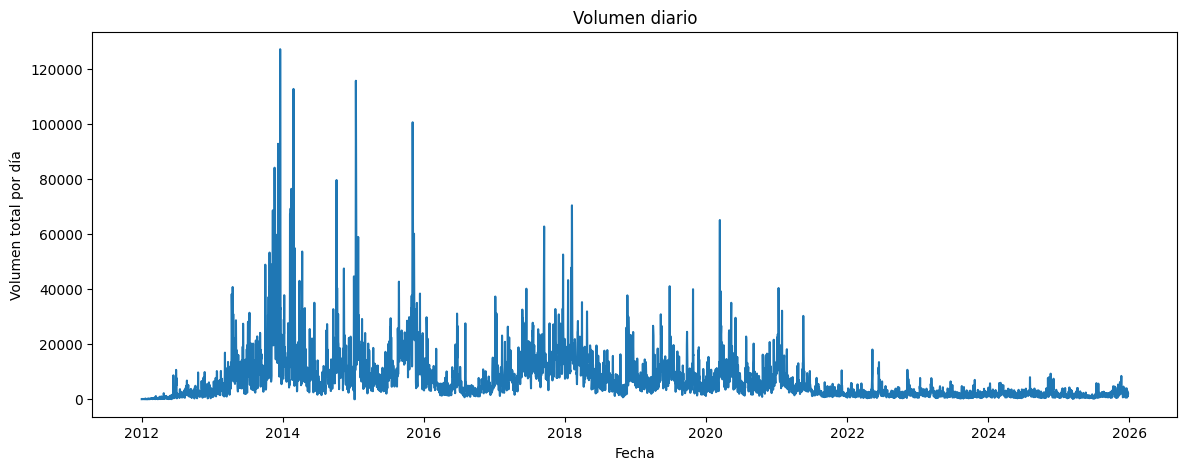

In [60]:
# grafico solo de las transacciones
vol_diario = transacciones["Volume"].resample("D").sum()

plt.figure(figsize=(14,5))
plt.plot(vol_diario.index, vol_diario)
plt.title("Volumen diario")
plt.xlabel("Fecha")
plt.ylabel("Volumen total por día")
plt.show()

In [61]:
data["Timestamp"]

0         2012-01-01 10:01:00
1         2012-01-01 10:02:00
2         2012-01-01 10:03:00
3         2012-01-01 10:04:00
4         2012-01-01 10:05:00
                  ...        
7355192   2025-12-26 23:53:00
7355193   2025-12-26 23:54:00
7355194   2025-12-26 23:55:00
7355195   2025-12-26 23:56:00
7355196   2025-12-26 23:57:00
Name: Timestamp, Length: 7355197, dtype: datetime64[ns]

In [66]:
data= data.set_index("Timestamp")

In [68]:
data

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...
2025-12-26 23:53:00,87304.00,87334.00,87304.00,87317.00,0.881167
2025-12-26 23:54:00,87317.00,87317.00,87296.00,87296.00,0.269367
2025-12-26 23:55:00,87287.00,87296.00,87287.00,87296.00,0.269195


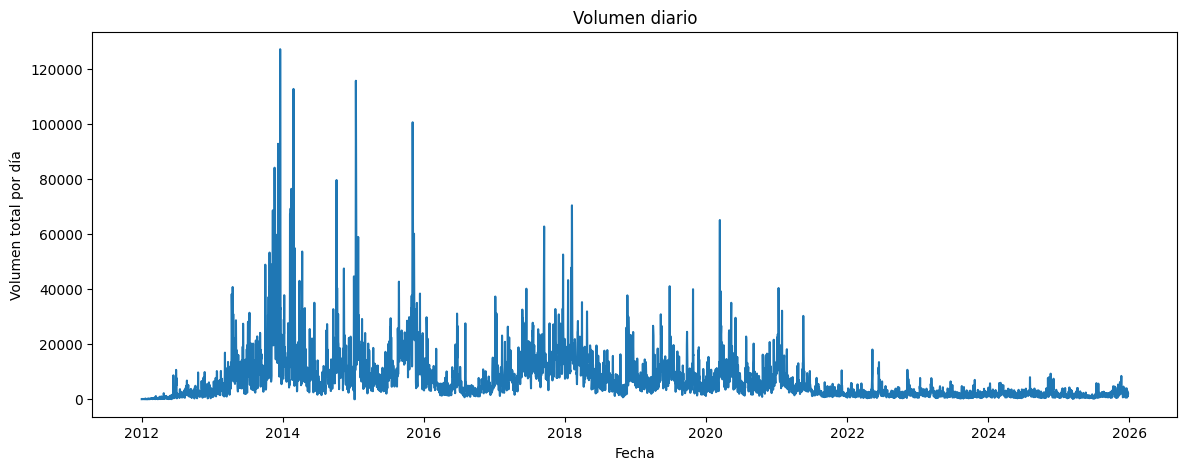

In [69]:
#grafica del dataset original 
vol_diario = data["Volume"].resample("D").sum()

plt.figure(figsize=(14,5))
plt.plot(vol_diario.index, vol_diario)
plt.title("Volumen diario")
plt.xlabel("Fecha")
plt.ylabel("Volumen total por día")
plt.show()

Objetivamente es lo mismo 

Vamos a observar los datos mas recientes

In [71]:
df_filtrado = data.loc['2022-01-01' : '2026-12-31']

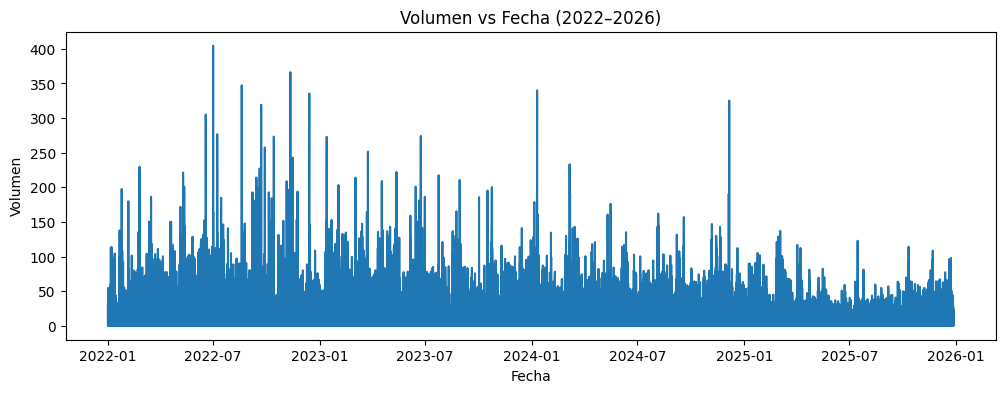

In [72]:
df_filtrado = data.loc['2022-01-01' : '2026-12-31']

plt.figure(figsize=(12,4))
plt.plot(df_filtrado.index, df_filtrado['Volume'])
plt.title("Volumen vs Fecha (2022–2026)")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.show()